In [1]:
!pip install konlpy
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-v_g1d7tp
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-v_g1d7tp
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 04aeebcbe26b109486a642e57dc58665c4818cf3
  Preparing metadata (setup.py) ... done
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [2]:
import pandas as pd
import numpy as np
import re
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/KU-BIG/KUBIG_2024_SPRING/main/BASIC%20STUDY/NLP/WEEK1/protein.csv")

In [5]:
df.head()

,Unnamed: 0,title,content,text
0,0,처음 사먹어 보는데 맛있네요,맛이 좋아서 꾸준히 먹고 있습니다.^^,처음 사먹어 보는데 맛있네요맛이 좋아서 꾸준히 먹고 있습니다.^^
1,1,말해 뭐합니까 ㅋㅋㅋ 역시,가성비 갑 제품 + 맛도 다양해서 ㅋㅋㅋ 항상 구매하고 있습니다요! \n\n ...,말해 뭐합니까 ㅋㅋㅋ 역시가성비 갑 제품 + 맛도 다양해서 ㅋㅋㅋ 항상 구매하고 있...
2,2,좋넹요,맛있습니다. 저번에 말차라떼도 먹어봤는데 그것보다 더 나은거 같네요,좋넹요맛있습니다. 저번에 말차라떼도 먹어봤는데 그것보다 더 나은거 같네요
3,3,매우 만족합니다,5키로는 정말 엄청크네요.\n 평점이 좋아서 스트로베리크림으로 주문했는데 좋습...,매우 만족합니다5키로는 정말 엄청크네요.\n 평점이 좋아서 스트로베리크림으로 ...
4,4,마싯어요,약간 달긴 하지만 물에 잘 녹고 가루날림이 거의없어 좋아요,마싯어요약간 달긴 하지만 물에 잘 녹고 가루날림이 거의없어 좋아요


In [6]:
def extract_hangul(text):
  hangul = re.sub('[^가-힣]', ' ', text)
  return hangul

In [7]:
example = extract_hangul(df['text'][1])
print("전처리 이전: ",df['text'][1])
print("전처리 이후: ",example)

전처리 이전:  말해 뭐합니까 ㅋㅋㅋ 역시가성비 갑 제품 + 맛도 다양해서 ㅋㅋㅋ 항상 구매하고 있습니다요! 

    스트로베리 크림치즈가 가장 맛있었네요!
전처리 이후:  말해 뭐합니까     역시가성비 갑 제품   맛도 다양해서     항상 구매하고 있습니다요        스트로베리 크림치즈가 가장 맛있었네요 


In [8]:
from pykospacing import Spacing
spacing = Spacing()

In [9]:
def spacing_text(text):
  spaced_text = spacing(text)
  return spaced_text

In [10]:
spaced = spacing_text(example)
print("전처리 이전: ",example)
print("전처리 이후: ",spaced)

전처리 이전:  말해 뭐합니까     역시가성비 갑 제품   맛도 다양해서     항상 구매하고 있습니다요        스트로베리 크림치즈가 가장 맛있었네요 
전처리 이후:  말해 뭐 합니까 역시 가성비 갑 제품 맛도 다양해서 항상 구매하고 있습니다 요 스트로베리 크림치즈가 가장 맛있었네요


In [11]:
from konlpy.tag import Okt
okt = Okt()

In [12]:
def extract_morphs(text):
  morphs_ = okt.morphs(text, stem=True)
  return morphs_

In [13]:
morphs_ = extract_morphs(spaced)
print("전처리 이전: ",spaced)
print("전처리 이후: ",morphs_)

전처리 이전:  말해 뭐 합니까 역시 가성비 갑 제품 맛도 다양해서 항상 구매하고 있습니다 요 스트로베리 크림치즈가 가장 맛있었네요
전처리 이후:  ['말', '하다', '뭐', '합', '니까', '역시', '가성', '비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '있다', '요', '스트로베리', '크림', '치즈', '가', '가장', '맛있다']


In [15]:
with open('/content/drive/MyDrive/KUBIG winter NLP/stopword.txt') as f:
    list_file = f.readlines()

stopwords_list = []
for stopword in list_file:
  stopwords = re.sub('[\n]', '', stopword)
  stopwords_list.append(stopwords)

def remove_stopwords(text):
  remove_stop = [x for x in text if x not in stopwords_list]
  return remove_stop


In [16]:
remove_stop = remove_stopwords(morphs_)
print("전처리 이전: ",morphs_)
print("전처리 이후: ",remove_stop)

전처리 이전:  ['말', '하다', '뭐', '합', '니까', '역시', '가성', '비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '있다', '요', '스트로베리', '크림', '치즈', '가', '가장', '맛있다']
전처리 이후:  ['말', '뭐', '합', '니까', '역시', '가성', '비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '요', '스트로베리', '크림', '치즈', '가장', '맛있다']


In [17]:
def remove_one(text):
  except_list = ['맛','향','짱']
  remove_one_ = [x for x in text if len(x)>1 or x in except_list]
  return remove_one_

In [18]:
remove_one_ = remove_one(remove_stop)
print("전처리 이전: ",remove_stop)
print("전처리 이후: ",remove_one_)

전처리 이전:  ['말', '뭐', '합', '니까', '역시', '가성', '비', '갑', '제품', '맛', '도', '다양하다', '항상', '구매', '하고', '요', '스트로베리', '크림', '치즈', '가장', '맛있다']
전처리 이후:  ['니까', '역시', '가성', '제품', '맛', '다양하다', '항상', '구매', '하고', '스트로베리', '크림', '치즈', '가장', '맛있다']


In [19]:
import os

os.chdir('/usr/local/lib/python3.10/dist-packages/konlpy/java')
os.getcwd()
os.makedirs('./aaaa')

In [20]:
os.chdir('/usr/local/lib/python3.10/dist-packages/konlpy/java/aaaa')
os.getcwd()


'/usr/local/lib/python3.10/dist-packages/konlpy/java/aaaa'

In [21]:
!jar xvf ../open-korean-text-2.1.0.jar

  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/processor/util/freq/
  created: org/openkoreantext/processor/util/josa/
  created: org/openkoreantext/processor/util/noun/
  created: org/openkoreantext/processor/util/substantives/
  created: org/openkoreantext/processor/util/typos/
  created: org/openkoreantext/processor/util/verb/
 inflated: org/openkoreantext/pr

In [22]:
with open(f"/usr/local/lib/python3.10/dist-packages/konlpy/java/aaaa/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

In [23]:
data

'가몽\n가온\n갓세븐\n강새이\n게임닉가\n관우\n귀여미\n규\n김유이\n김준면\n까까런\n노컷\n누너예\n니노\n다마고치\n다이무스\n대학생\n데이브\n도요토미\n동운\n동이\n두주니\n디시인사이드\n디오\n라몹\n라스\n라옵\n멍구\n메이든\n명덕\n명량\n문민정부\n미네\n방엘리\n병헌\n붓다\n비정상회담\n빼빼로\n삼풍\n샤인온미\n성식\n성열\n세라문\n세라복\n세종대왕\n손권\n손책\n쇼미더머니\n쇼챔\n순규\n스라소니\n신동아\n신쓰패밀리\n신아라\n아베\n안상홍\n안홍준\n여누\n여랑\n여포\n연합\n오꾸닭\n요섭\n웃찾사\n원식\n유병언\n유비\n유이\n윤기형\n이나단\n이명박\n이완용\n임창용\n자괴\n자니윤\n자대련\n자유\n재중이\n전교조\n정윤회\n제갈량\n조자룡\n조조\n준면\n지오디\n지존파\n진영오\n차작가\n차트\n창섭\n챠트\n첸\n코르사주\n하무열\n하용파쿠\n혁재\n현이\n현태\n혜미\n'

In [24]:
data += '프로틴\n가성비\n밀크티\n'

with open("/usr/local/lib/python3.10/dist-packages/konlpy/java/aaaa/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

In [25]:
!jar cvf ../open-korean-text-2.1.0.jar *


added manifest
ignoring entry META-INF/
adding: META-INF/maven/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.xml(in = 9127) (out= 2208)(deflated 75%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.properties(in = 119) (out= 110)(deflated 7%)
ignoring entry META-INF/MANIFEST.MF
adding: org/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/util/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/util/CharArrayMap$EntrySet.class(in = 2788) (out= 1181)(deflated 57%)
adding: org/openkoreantext/processor/util/CharArrayMap$1.class(in = 1531) (out= 571)(deflated 62%)
adding: org/openkoreantext/processor/util/example_tweets.txt(

In [26]:
print(okt.nouns("가성비"))
print(okt.nouns("프로틴"))

['가성', '비']
['프로', '틴']


In [28]:
from konlpy.tag import Okt
okt = Okt()

from pykospacing import Spacing
spacing = Spacing()

except_list = ['맛','향','짱']

with open('/content/drive/MyDrive/KUBIG winter NLP/stopword.txt') as f:
    list_file = f.readlines()

stopwords_list = []
for stopword in list_file:
  stopwords = re.sub('[\n]', '', stopword)
  stopwords_list.append(stopwords)

def review_to_words(raw_review):
  text = re.sub('[^가-힣]', ' ', raw_review)
  text = spacing(text)
  text = okt.morphs(text, stem=True)
  text = [x for x in text if x not in stopwords_list]
  text = [x for x in text if len(x)>1 or x in except_list]
  text = " ".join(text)
  return text

In [29]:
import tqdm
df_len = df.shape[0]
words_list = []
for i in range(df_len):
  words_list.append(review_to_words(df['text'][i]))

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
def displayWordCloud(data = None, backgroundcolor = 'white', width=None, height=None):
    wordcloud = WordCloud(font_path = '/content/drive/MyDrive/KUBIG winter NLP/MALGUN.TTF',
                          background_color = backgroundcolor,
                          width = width,
                          height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

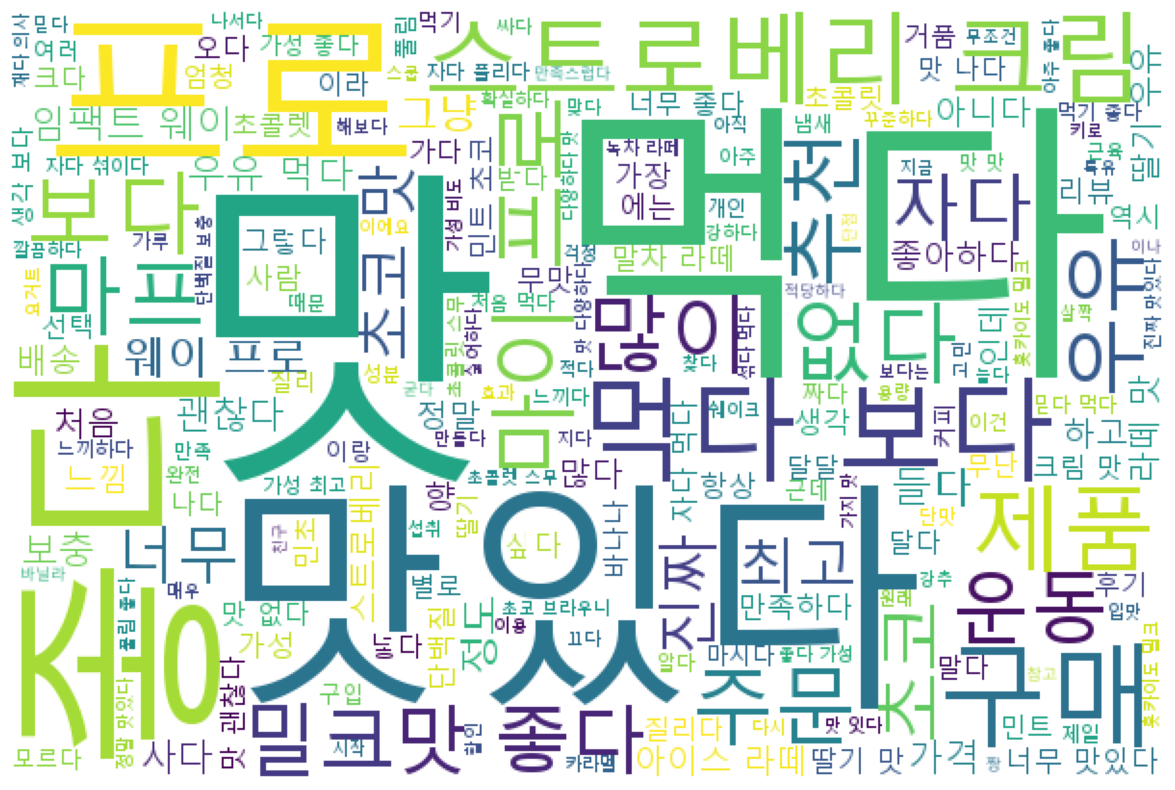

In [34]:
displayWordCloud(data = ' '.join(words_list), width=600, height=400)